# ROC curves
Data Mining for Business Analytics

Robert Moakler, Spring 2016
***

We start off as we usually do. Let's import some things that will be useful.

In [2]:
# Import pandas to read in data
import pandas as pd
import numpy as np

# Import matplotlib for plotting
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8


# Import decision trees and logistic regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Import train, test, and evaluation functions
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Data
We're going to use a mail response data set from a real direct marketing campaign located in `data/mailing.csv`. Each record represents an individual who was targeted with a direct marketing offer.  The offer was a solicitation to make a charitable donation. 

The columns (features) are:

```
Col.  Name      Description
----- --------- ----------------------------------------------------------------
1     income    household income
2     Firstdate data assoc. with the first gift by this individual
3     Lastdate  data associated with the most recent gift 
4     Amount    average amount by this individual over all periods (incl. zeros)
5     rfaf2     frequency code
6     rfaa2     donation amount code
7     pepstrfl  flag indicating a star donator
8     glast     amount of last gift
9     gavr      amount of average gift
10    class     one if they gave in this campaign and zero otherwise.
```

Our goal is to build a model to predict if people will give during the current campaign (this is the attribute called `"class"`).

### Creating ROC curves
Below we will create some ROC curves for a few different decision trees with varying complexities.

In [ ]:
# Read in our csv data
data = pd.read_csv("data/mailing.csv")

# Put all features into X and the target variable into Y
X = data.drop(['class'], axis=1)
Y = data['class']

# Split the data into 75% training and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75)

for max_depth in range(10,15):
    # Create an empty tree with the max depth I'm currently using
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)

    # Fit my tree on training data
    tree.fit(X_train, Y_train)

    # Get probabilities for my tree on the test data
    Y_test_probabilities = tree.predict_proba(X_test)[:, 1]

    # Get TPR and FPR from my tree
    fpr, tpr, thresholds = roc_curve(Y_test, Y_test_probabilities)

    # Get area under the ROC curve
    auc = roc_auc_score(Y_test, Y_test_probabilities)
    
    # I'm going to round the AUC to 2 decimal places
    auc = round(auc, 2)
    
    # Plot my ROC curve and label it with my depth and AUROC
    plt.plot(fpr, tpr, label="md=" + str(max_depth) + ", AUC=" + str(auc))

# Add the random line and legend
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend(loc=2)

# Show the plot
plt.show()

### Team work
Get together with your teams and try to create a plot with at least two ROC curves on it. One should be from a decision tree and one from a logistic regression. You can choose any complexity or complexities that you want.

**Which model would you probably choose? Is it hard to tell?**

In [ ]:
# Read in our csv data
data = pd.read_csv("data/mailing.csv")

# Put all features into X and the target variable into Y
X = data.drop(['class'], axis=1)
Y = data['class']

# Split the data into 75% training and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75)

# Create empty models (at least two!)
tree = DecisionTreeClassifier(criterion="entropy", max_depth=...)
logistic = LogisticRegression(C=...)

# Train models on training data
tree. ...
logistic. ...

# Get probabilities for my models on test data
Y_test_probabilities_tree = tree.predict_proba(...)[:, 1]
Y_test_probabilities_logistic = logistic.predict_proba(...)[:, 1]

# Get TPR and FPR from my models
fpr_tree, tpr_tree, thresholds_tree = roc_curve(Y_test, Y_test_probabilities_tree)
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(Y_test, Y_test_probabilities_logistic)

# Plot ROC curves
# Can you try to add the AUC to the label?
plt.plot(fpr_tree, tpr_tree, label="tree")
plt.plot(fpr_logistic, tpr_logistic, label="logistic")

# Add the random line and legend
plt.plot([0,1], [0,1], 'k--', label="Random")
plt.legend(loc=2)

# Show the plot
plt.show()

[  0.00000000e+00   8.78483737e-05   1.53734654e-04   1.53734654e-04
   1.75696747e-04   2.19620934e-04   3.73355588e-04   5.49052336e-04
   4.59007753e-03   4.98539521e-03   9.94882832e-03   5.33020007e-02
   6.24162695e-02   9.28337689e-02   1.03748929e-01   1.92805218e-01
   2.37102761e-01   2.44657721e-01   4.55208310e-01   5.19732941e-01
   5.44374410e-01   5.44791690e-01   5.49667274e-01   5.97786221e-01
   6.20538950e-01   7.49829794e-01   9.97122966e-01   9.99428986e-01
   1.00000000e+00]
[ 0.          0.          0.00207297  0.00331675  0.00331675  0.00331675
  0.00331675  0.00414594  0.01616915  0.01741294  0.02819237  0.11774461
  0.13266998  0.18117745  0.20066335  0.33250415  0.36650083  0.3752073
  0.5854063   0.64303483  0.67371476  0.67412935  0.6778607   0.71310116
  0.73175788  0.82960199  0.99751244  0.99917081  1.        ]


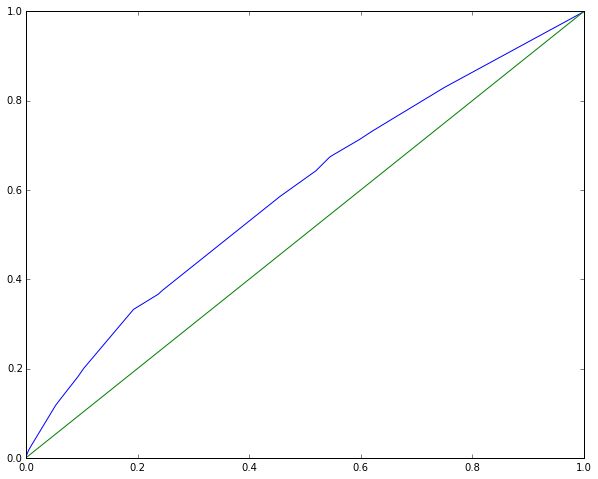

In [6]:
# Read in our csv data
data = pd.read_csv("data/mailing.csv")

# Put all features into X and the target variable into Y
X = data.drop(['class'], axis=1)
Y = data['class']

# Split the data into 75% training and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75)

tree = DecisionTreeClassifier(criterion="entropy", max_depth=5)

tree.fit(X_train, Y_train)

Y_test_probabilities = tree.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(Y_test, Y_test_probabilities)

print fpr
print tpr
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])
